# Climate

In [1]:
%matplotlib notebook

In [12]:
# imports
import os
import numpy as np
import datetime

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import xarray

# Load

In [3]:
climate_file ='/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/NOAA_OI_varyclimate_1983-2019.nc'
climate_file_95 ='/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/NOAA_OI_varyclimate_1983-2019_95.nc'

In [4]:
ds_90 = xarray.open_dataset(climate_file)
ds_90

FileNotFoundError: [Errno 2] No such file or directory: b'/home/xavier/Projects/Oceanography/data/SST/NOAA-OI-SST-V2/NOAA_OI_varyclimate_1983-2019.nc'

In [6]:
ds_95 = xarray.open_dataset(climate_file_95)
ds_95

<xarray.Dataset>
Dimensions:    (doy: 366, lat: 720, lon: 1440)
Coordinates:
  * doy        (doy) int64 1 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365 366
  * lat        (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon        (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    seasonalT  (doy, lat, lon) float32 ...
    threshT    (doy, lat, lon) float32 ...

# Plot thresh

<IPython.core.display.Javascript object>


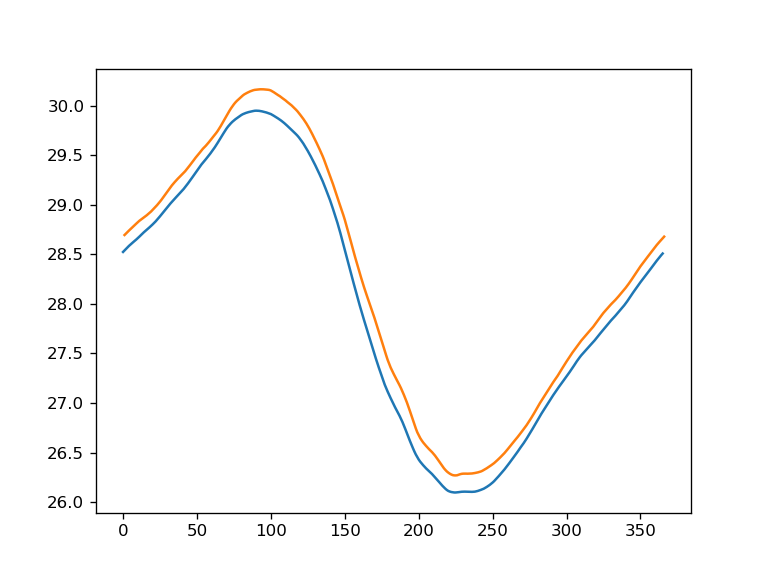

In [15]:
plt.clf()
ax = plt.gca()
ax.plot(ds_90.day.data, ds_90.threshT.data[:,360,0], label='T90')
ax.plot(ds_95.doy.data, ds_95.threshT.data[:,360,0], label='T95')
#
plt.show()

# Climate images

In [7]:
std_climate_file = os.path.join(os.getenv('NOAA_OI'), 'NOAA_OI_climate_1983-2019.nc')

In [9]:
std_clim = xarray.open_dataset(std_climate_file)
std_clim

<xarray.Dataset>
Dimensions:    (day: 366, lat: 720, lon: 1440)
Coordinates:
  * day        (day) int64 0 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
  * lat        (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon        (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    seasonalT  (day, lat, lon) float32 ...
    threshT    (day, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7

In [14]:
jun_seas = std_clim.seasonalT.isel(day=180)
jun_seas

<xarray.DataArray 'seasonalT' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
    day      int64 180
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Attributes:
    units:    degC

In [23]:
zeros = jun_seas.data[:] == 0.
jun_seas.data[zeros] = -np.nan

<IPython.core.display.Javascript object>


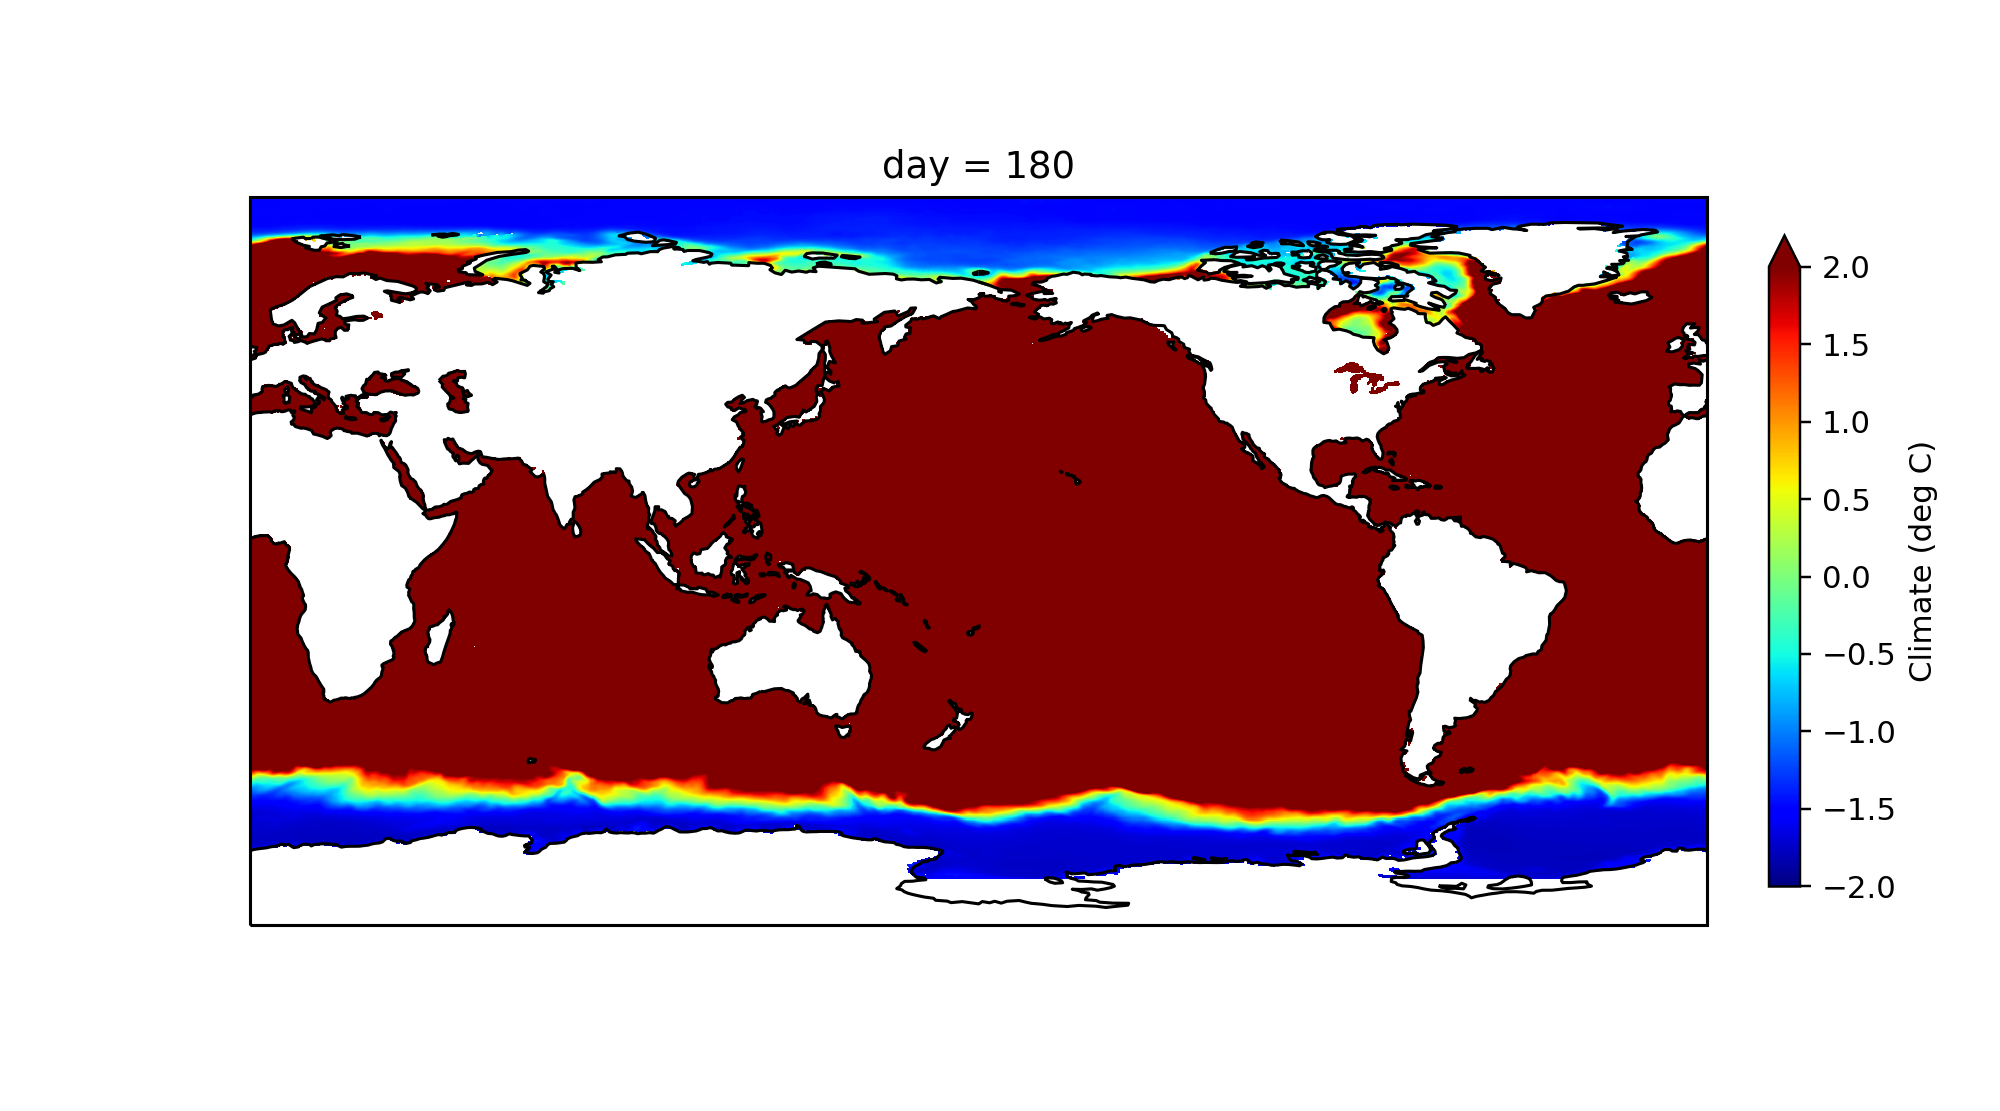

In [25]:
fig = plt.figure(figsize=(9, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)

cm = plt.get_cmap('jet')
p = jun_seas.plot(cmap=cm, transform=ccrs.PlateCarree(),
                  vmin=-2., vmax=2., 
                   subplot_kws={'projection': proj},
                   cbar_kwargs={'label': 'Climate (deg C)',
                                'fraction': 0.020, 'pad': 0.04})
ax = p.axes
# Add coastlines to the map created by contourf.
ax.coastlines()
plt.show()

## Double check NOAA

In [26]:
rand_climate_file = os.path.join(os.getenv('NOAA_OI'), 'sst.day.mean.1997.nc')
rand = xarray.open_dataset(rand_climate_file)

In [27]:
rand

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01 1997-01-02 ... 1997-12-31
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:43:21 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....

In [28]:
d = datetime.datetime(1997, 6, 1)

In [30]:
snap = rand.sst.sel(time=d)

In [31]:
snap

<xarray.DataArray 'sst' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 1997-06-01
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8      34.559998]

In [34]:
np.sum((snap.data < 0.) & np.isfinite(snap.data))

/home/xavier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


164758